In [2]:
import nltk
from nltk.tokenize import word_tokenize
#nltk.download()

import pandas as pd
import os
from nltk.corpus import stopwords

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from  sklearn.metrics  import accuracy_score

In [3]:
#function to split text into word
tokens = word_tokenize('The quick brown fox jumps over the lazy dog')
#nltk.download('stopwords')
print('tokens:\n', tokens)

tokens:
 ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']


In [4]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]
print('tokens:\n', tokens)

tokens:
 ['The', 'quick', 'brown', 'fox', 'jumps', 'lazy', 'dog']


In [5]:
#NLTK provides several stemmer interfaces like Porter stemmer, Lancaster Stemmer, Snowball Stemmer
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stems=[]
for t in tokens:
    stems.append(porter.stem(t))
    
print(stems)

['the', 'quick', 'brown', 'fox', 'jump', 'lazi', 'dog']


Bag of Words (BOW): We make the list of unique words in the text corpus called vocabulary. 
Then we can represent each sentence or document as a vector with each word 
represented as 1 for present and 0 for absent from the vocabulary. 
Another representation can be count the number of times each word appears in a document. 
The most popular approach is using the Term Frequency-Inverse Document Frequency (TF-IDF) technique.


Term Frequency (TF) = (Number of times term t appears in a document)/(Number of terms in the document)

Inverse Document Frequency (IDF) = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in. The IDF of a rare word is high, whereas the IDF of a frequent word is likely to be low. 
Thus having the effect of highlighting words that are distinct.

We calculate TF-IDF value of a term as = TF * IDF

TF('beautiful',Document1) = 2/10, IDF('beautiful')=log(2/2) = 0
TF(‘day’,Document1) = 5/10,  IDF(‘day’)=log(2/1) = 0.30

TF-IDF(‘beautiful’, Document1) = (2/10)*0 = 0
TF-IDF(‘day’, Document1) = (5/10)*0.30 = 0.15

One of the major disadvantages of using BOW is that it discards word order 
thereby ignoring the context and in turn meaning of words in the document. 
For natural language processing (NLP) maintaining the context of the words is of utmost importance. 
To solve this problem we use another approach called Word Embedding.

Word Embedding: 

It is a representation of text where words 
that have the same meaning have a similar representation. 
In other words it represents words in a coordinate system where related words,
based on a corpus of relationships, are placed closer together.

Word2Vec
Word2vec takes as its input a large corpus of text and produces a vector space 
with each unique word being assigned a corresponding vector in the space. 
Word vectors are positioned in the vector space such that words that share 
common contexts in the corpus are located in close proximity to one another in the space. 
Word2Vec is very famous at capturing meaning and demonstrating it on tasks 
like calculating analogy questions of the form a is to b as c is to ?. 
For example, man is to woman as uncle is to ? (aunt) using a simple vector 
offset method based on cosine distance. For example, here are vector offsets 
for three word pairs illustrating the gender relation:

Glove
The Global Vectors for Word Representation, or GloVe, 
algorithm is an extension to the word2vec method 
for efficiently learning word vectors. 
GloVe constructs an explicit word-context or 
word co-occurrence matrix using statistics across the whole text corpus. 
The result is a learning model that may result in generally better word embeddings.

In [6]:
folder= '/home/Documents/code/Tutorials/datasets/aclImdb/'
labels = {'pos': 1, 'neg': 0}
df = pd.DataFrame()



In [7]:
for f in ('test', 'train'):    
    for l in ('pos', 'neg'):
        path = os.path.join(folder, f, l)
        for file in os.listdir (path) :
            with open(os.path.join(path, file),'r', encoding='utf-8') as infile:
                txt = infile.read()
            df = df.append([[txt, labels[l]]],ignore_index=True)
            
df.columns = ['review', 'sentiment']

In [8]:
df.head

<bound method NDFrame.head of                                                   review  sentiment
0      This version of ALICE IN WONDERLAND is truly o...          1
1      This movie was fabulous. It is definitely a to...          1
2      Camp North Star and it's Camp counselor extrao...          1
3      From the crash of the opening theme, "The Man ...          1
4      One of Starewicz's longest and strangest short...          1
...                                                  ...        ...
49995  This movie causes more unintentional laughter ...          0
49996  I go to a lot of movies, often I bring my 5 ye...          0
49997  This one is bad. A really bad and boring crime...          0
49998  N.B.: Spoilers within. Assigning an artistic d...          0
49999  I've read a few books about Bonnie and Clyde, ...          0

[50000 rows x 2 columns]>

In [ ]:
df.to_csv('/home/Documents/code/Tutorials/datasets/aclImdb/movie_data.csv', index=False,encoding ='utf-8')

In [9]:
df.head()

,review,sentiment
0,This version of ALICE IN WONDERLAND is truly o...,1
1,This movie was fabulous. It is definitely a to...,1
2,Camp North Star and it's Camp counselor extrao...,1
3,"From the crash of the opening theme, ""The Man ...",1
4,One of Starewicz's longest and strangest short...,1


To get the frequency distribution of the words in the text,
we can utilize the nltk.FreqDist() function, 
which lists the top words used in the text, 
providing a rough idea of the main topic in the text data, 
as shown in the following code:

In [10]:
reviews = df.review.str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(reviews)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

198757


['the',
 ',',
 '.',
 'a',
 'and',
 'of',
 'to',
 'is',
 '/',
 '>',
 '<',
 'br',
 'in',
 'I',
 'it',
 'that',
 "'s",
 'this',
 'was',
 'The',
 'as',
 'with',
 'movie',
 'for',
 'film',
 ')',
 '(',
 'but',
 "''",
 "n't",
 '``',
 'on',
 'you',
 'are',
 'not',
 'have',
 'his',
 'be',
 '!',
 'he',
 'one',
 'at',
 'by',
 'an',
 'all',
 'who',
 'they',
 'from',
 'like',
 'It']

In [11]:
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]

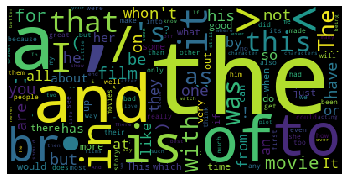

In [13]:
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [14]:
#Building a Classifier

X_train = df.loc[:24999, 'review'].values
y_train = df.loc[:24999, 'sentiment'].values
X_test = df.loc[25000:, 'review'].values
y_test = df.loc[25000:, 'sentiment'].values

In [15]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(25000, 73822) (25000, 73822)


In [16]:
clf = MultinomialNB().fit(train_vectors, y_train)

In [17]:
predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted))

0.83664
